In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# audio.py
from audio import *

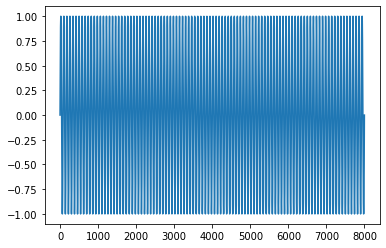

In [2]:
# サンプリング周波数16Hz、周期200Hz、0.5秒のsin波
plt.plot(sin_wave(200, 16000, 500))

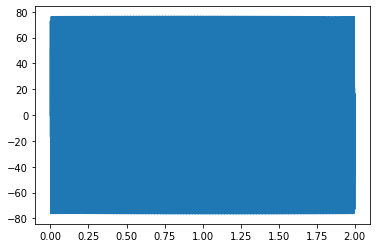

In [3]:
# サンプリング周波数 16kHz
# 振幅 4000

rate = 16000
ms = 2000

# 複数のsin波(周波数, 振幅)の線形和をサンプルデータとする。
data = sum(sin_wave(k, rate, ms) * a for k, a in [(200, 30), (500, 20), (700, 40)])
audio = Audio(rate, data)
audio.plot()

64 1024


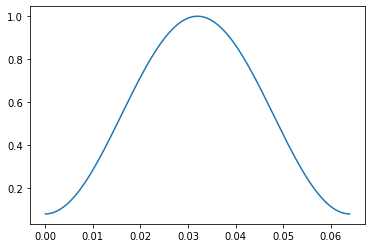

In [4]:
# ハミング窓の取得

frame_length = list(frame_candidates(rate))[-1]

hw = audio_hamming(frame_length, rate)
times = time_axis(hw, rate)

plt.plot(times, hw)
print(frame_length, len(times))

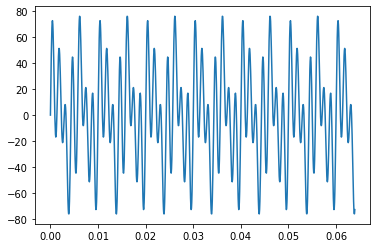

In [5]:
audio_frames = audio.each_frame(frame_length, 10)

# サンプルデータの最初のframe_length(ms)のクリップ
frame1 = next(audio_frames)
plt.plot(times, frame1)

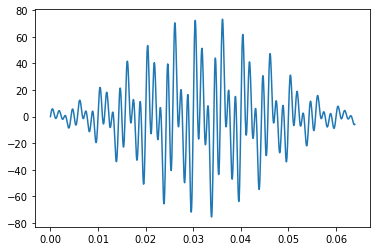

In [6]:
# ハミング窓の適用

windowed = frame1 * hw
plt.plot(times, windowed)

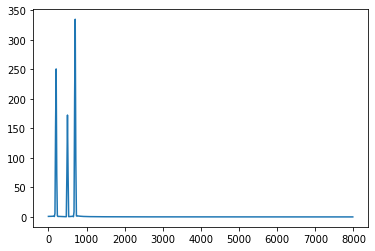

In [7]:
# 高速フーリエ変換 
N = len(hw)
ffted = np.abs(np.fft.fft(windowed, N, norm="ortho"))[:N//2]
freq = np.fft.fftfreq(N, d=1/rate)[:N//2]
plt.plot(freq, ffted)

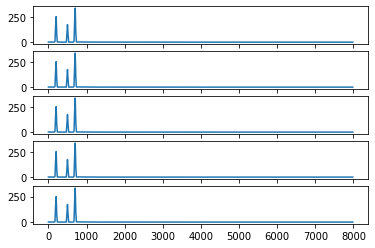

In [8]:
# 最初の5クリップの短時間フーリエ変換のプロット


def plot_stft(count):
    _, plots = plt.subplots(count, 1)
    N = len(hw)

    for _, frame, plot in zip(range(count), audio_frames, plots):
        windowed = frame * hw
        ffted = np.abs(np.fft.fft(windowed, norm="ortho"))[:N//2]

        freq = np.fft.fftfreq(N, d=1/rate)[:N//2]
        plot.plot(freq, ffted)

    
plot_stft(5)